In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.ndimage import gaussian_filter1d

In [14]:
feat_AUS = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS.pkl')
feat_AUS_test = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS_test.pkl')

feat_AUS.index = pd.to_datetime(feat_AUS.index)#
feat_AUS = feat_AUS.resample('5min').mean()
feat_AUS.index = pd.to_datetime(feat_AUS.index).tz_localize('Australia/Queensland')

In [16]:
freq_AUS = pd.read_pickle('../data/Mainland_AUS_frequency_data_2021-2024.pkl')

In [ ]:
test_feat = feat_AUS.copy()
test_freq = pd.DataFrame({'Frequency': freq_AUS.copy()})
test_feat.index
test_freq = test_freq.loc['2023-02-12 00:05:00+10:00':]
# # test_feat.index#test_freq.index
test_join = test_feat.join(test_freq)
feat_AUS
freq_AUS.loc['2023-02-12':'2024-03-24']

2023-02-12 00:00:00+10:00    50.031
2023-02-12 00:00:04+10:00    50.016
2023-02-12 00:00:08+10:00    50.012
2023-02-12 00:00:12+10:00    50.026
2023-02-12 00:00:16+10:00     50.03
                              ...  
2024-03-24 23:59:40+10:00    50.021
2024-03-24 23:59:44+10:00    50.012
2024-03-24 23:59:48+10:00    50.018
2024-03-24 23:59:52+10:00    50.025
2024-03-24 23:59:56+10:00    50.017
Length: 8791200, dtype: object

In [36]:
gaussian_filter1d(freq_AUS.values.astype(float), sigma=60)

array([50.00723971, 50.00723992, 50.00724024, ..., 49.99638358,
       49.99638154, 49.99638055])

In [35]:
freq_AUS.values.astype(float)

array([50.02199936, 50.00899887, 50.00699997, ..., 49.976     ,
       49.985     , 49.977     ])

In [18]:
feat_input_actual = pd.read_hdf('../data/[feature_data]/AUS/input_actual.h5')

In [19]:
freq = pd.read_pickle('../data/Mainland_AUS_frequency_data_2021-2024.pkl')

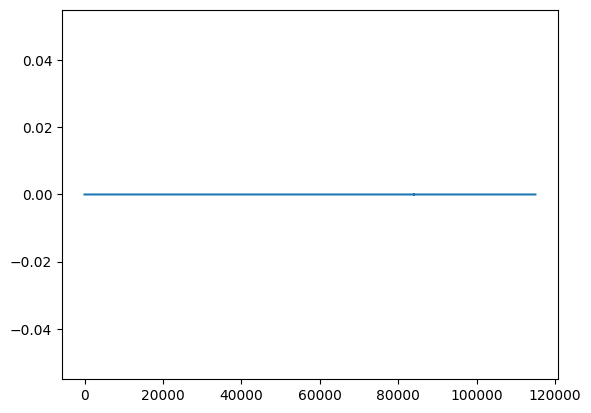

In [20]:
plt.plot(feat_AUS['Wind'].values - feat_input_actual['Wind_gen'].values)

In [3]:
feat_input_actual = pd.read_pickle('../data/[feature_data]/AUS/input_actual.pkl')

In [30]:
feat_nemosis = feat_input_actual.loc['2023-02-12 00:05:00+10:00':'2024-03-24 00:00:00+10:00']#['MWFLOW']

In [43]:
feat_AUS.columns,feat_nemosis.columns
feat_AUS.shape,feat_nemosis.shape

((116928, 28), (116928, 61))

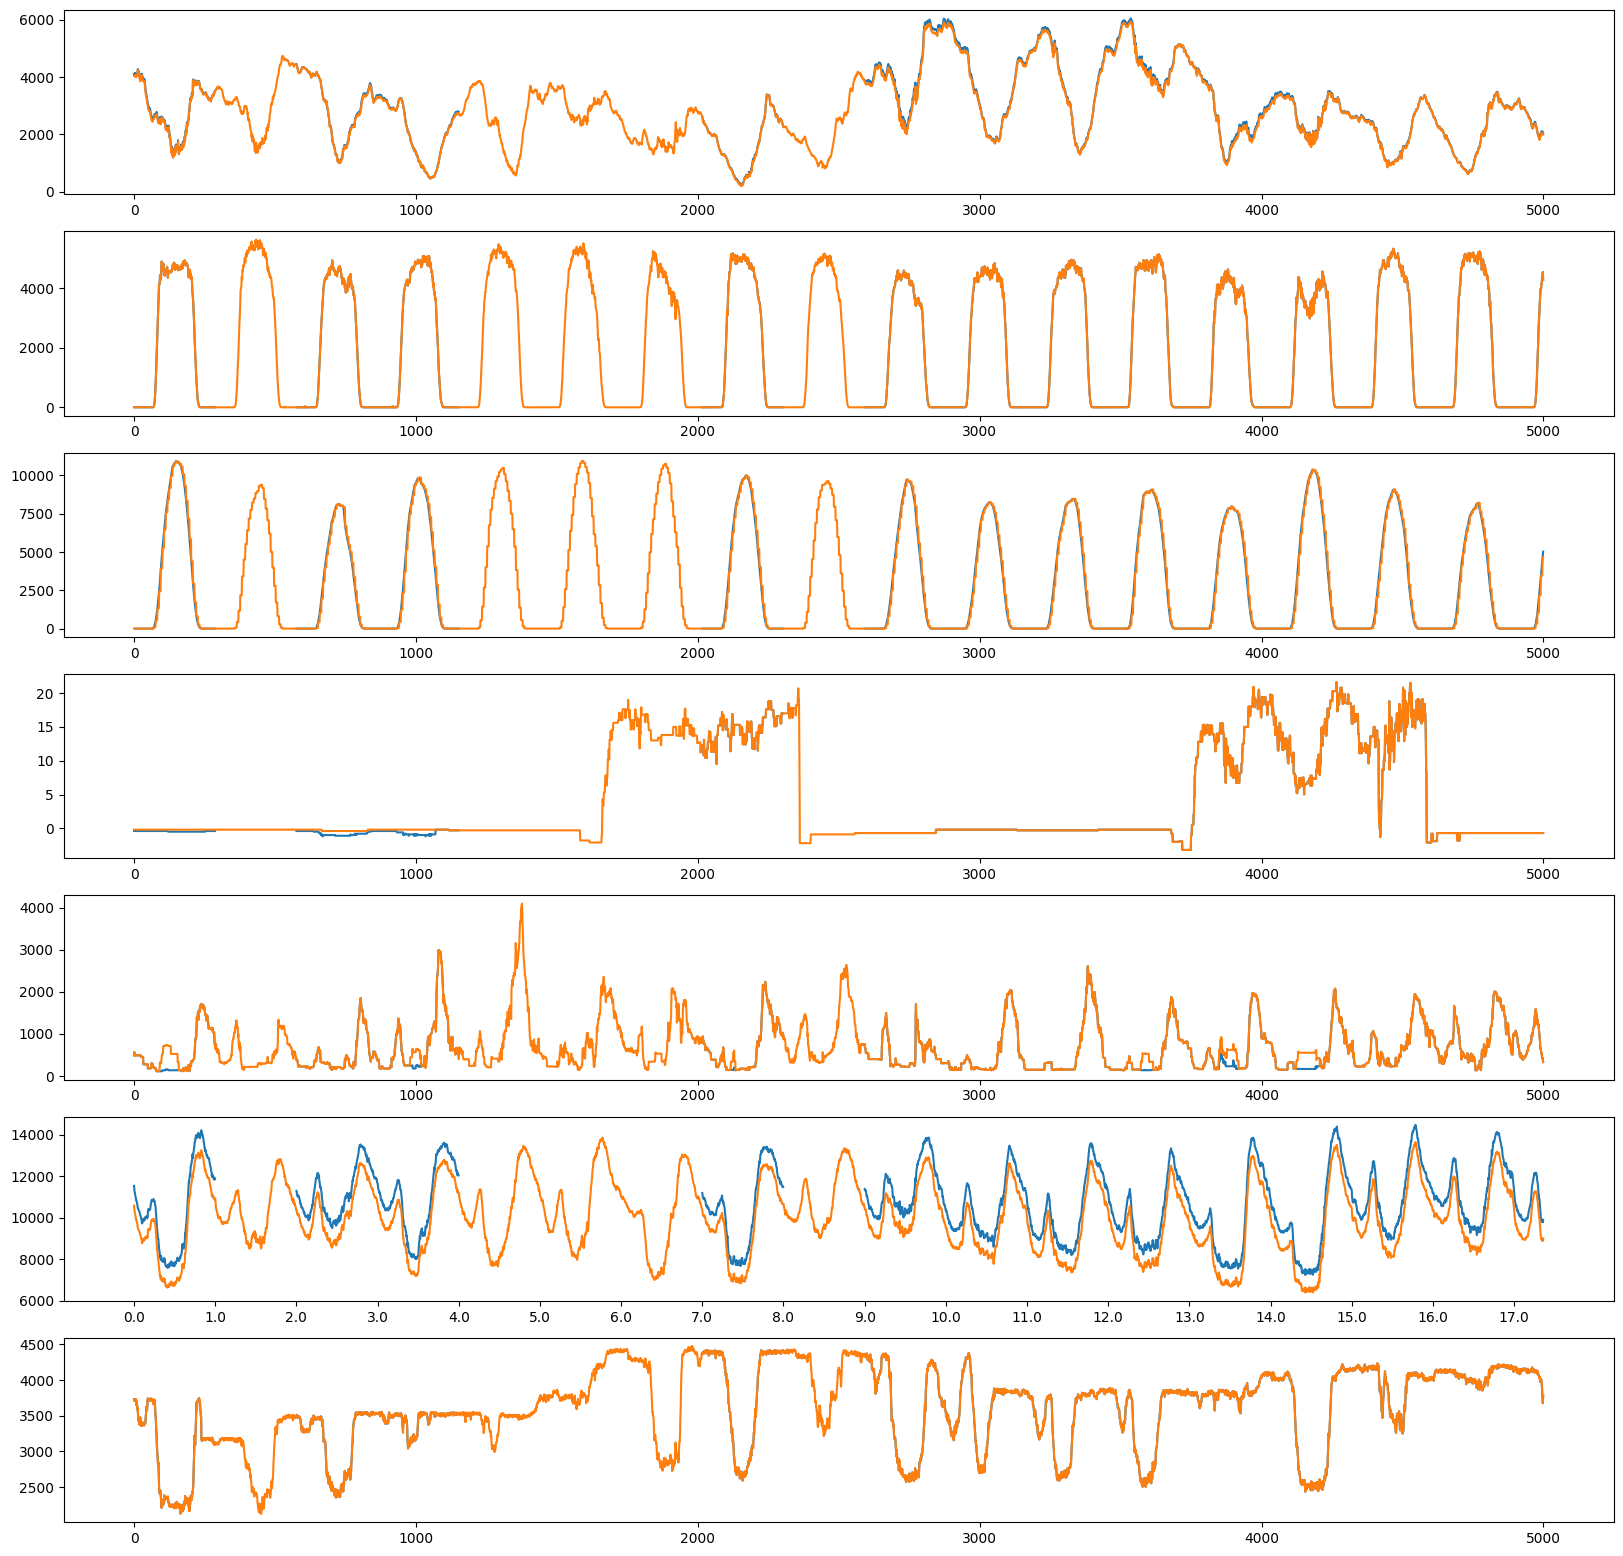

In [49]:
n = 5000
fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(feat_AUS['Wind'].values[:n])
# ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[-(n):-])
ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[:(n)])
#ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[1, :])
ax.plot(feat_AUS['Solar (Utility)'].values[:n])
ax.plot(feat_nemosis['generation: Solar, Descriptor: Solar'].values[:n])
#ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[2, :])
ax.plot(feat_AUS['Solar (Rooftop)'].values[:n])
ax.plot(feat_nemosis['ROOFTOP_PV_ACTUAL'].values[:n])
#ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[3, :])
ax.plot(feat_AUS['Biomass'].values[:n])
ax.plot(feat_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'].values[:n])
#ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[4, :])
ax.plot(feat_AUS['Hyrdo'].values[:n])
ax.plot(feat_nemosis['generation: Hydro, Descriptor: Water'].values[:n])
# ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[5, :])
ax.plot(feat_AUS['Coal (Black)'].values[:n])
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Black Coal'].values[:n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[6, :])
ax.plot(feat_AUS['Coal (Brown)'].values[:n])
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Brown Coal'].values[:n])
plt.show()

In [8]:
feat_nemosis['generation: Wind, Descriptor: Wind'].values[-(n+5*12*24):-5*12*24]

array([2441.096561, 2428.813093, 2401.906571, ...,         nan,
               nan,         nan])

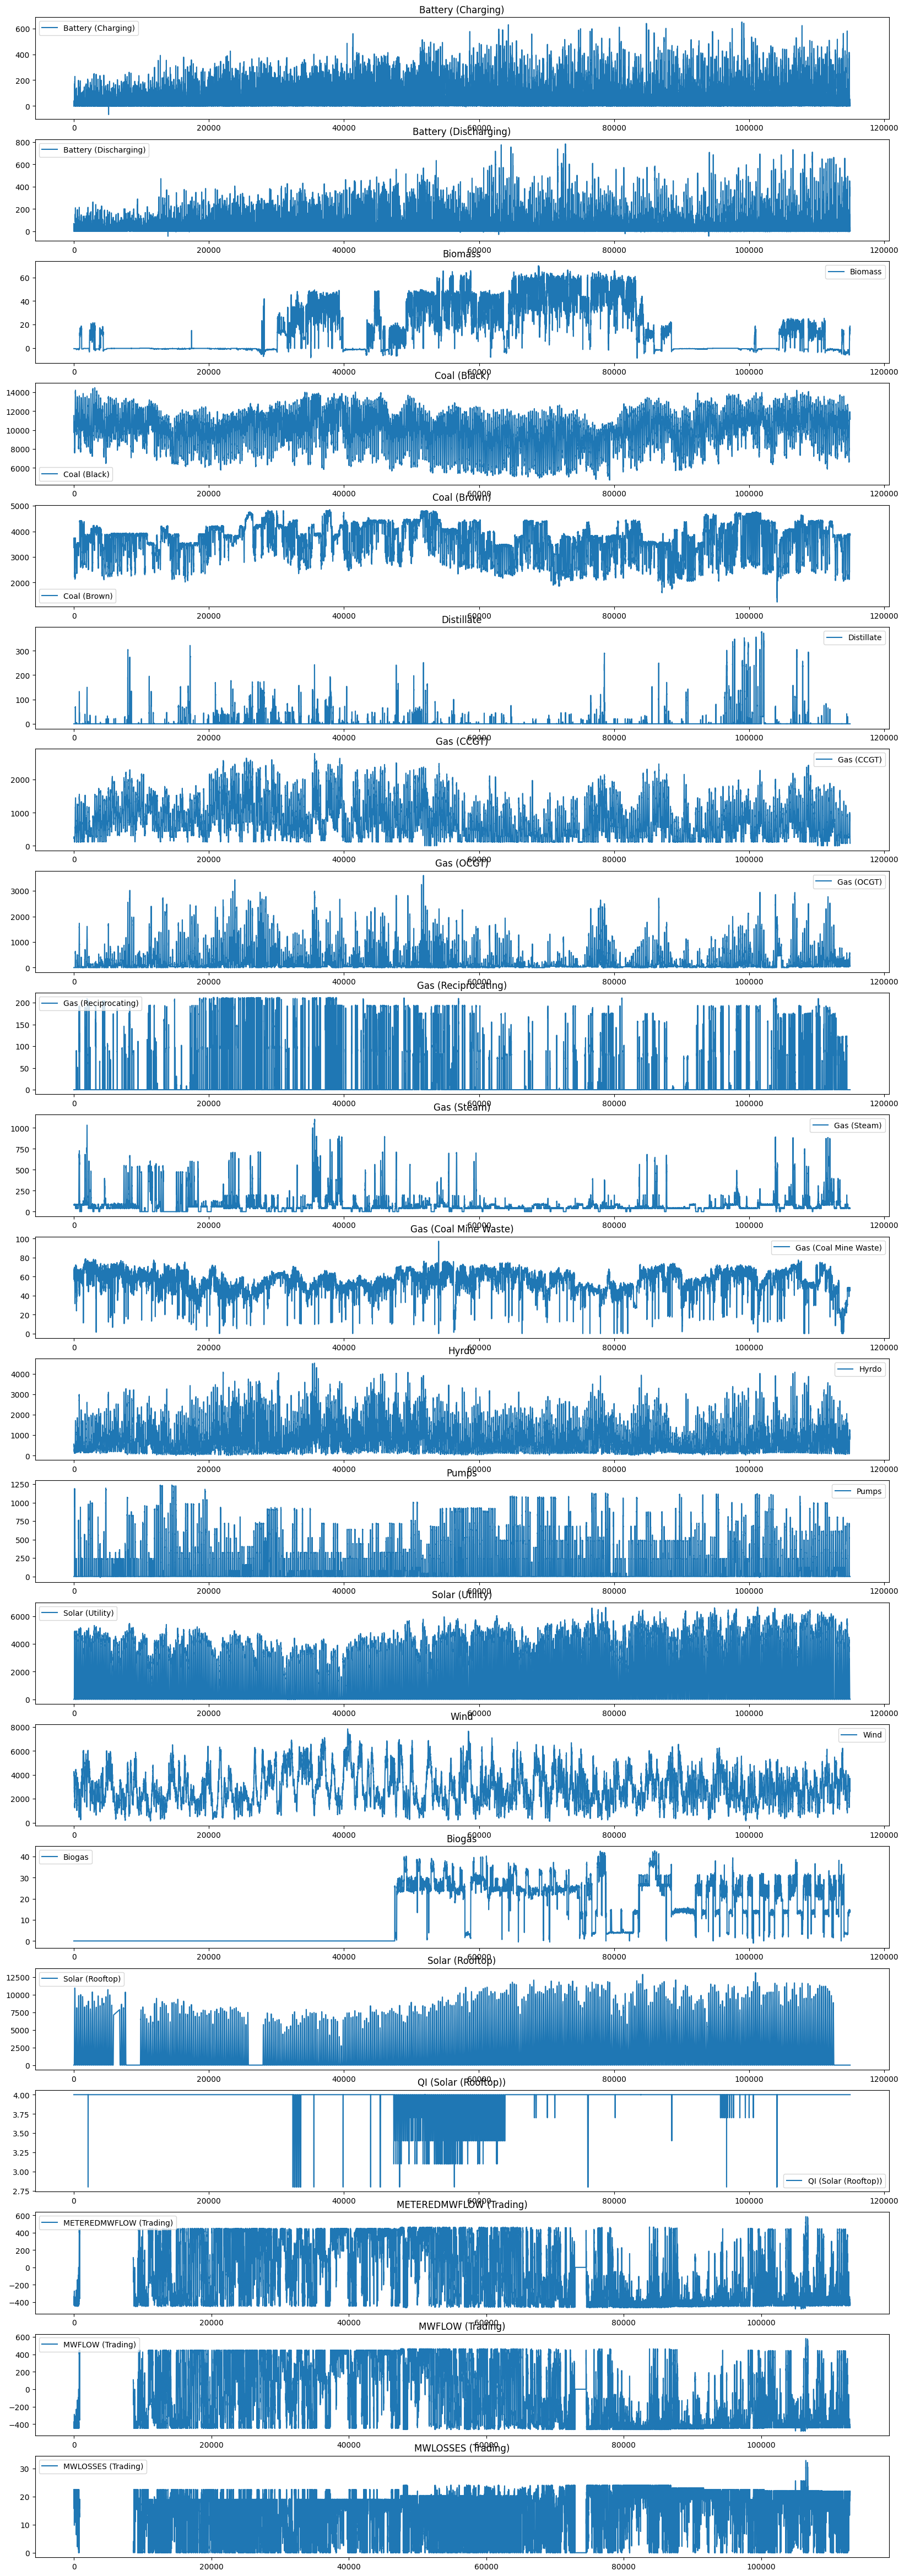

In [31]:
#plt.plot(feat_AUS['Aggregator (VPP)'].values)
fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
i = 0
for col in (feat_AUS.columns):
    if feat_AUS[col].max() < 0.1 and col not in ['Wind','Solar (Utility)','Solar (Rooftop)', 'Biomass', 'Hyrdo']:
        continue
    else:
        ax = fig.add_subplot(gs[i, :])
        ax.plot(feat_AUS[col].values, label = col)
        #ax.plot(feat_nemosis[col].values)
        ax.set_title(col)
        ax.legend()
        i+=1